<a href="https://colab.research.google.com/github/sthnischal/Kaggle-Competition-Titanic-Dataset-/blob/master/Titanic_Disaster_Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url = 'https://raw.githubusercontent.com/sthnischal/Kaggle-Competition-Titanic-Dataset-/master/train.csv'

In [3]:
train_data = pd.read_csv(url)

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
url1 = 'https://raw.githubusercontent.com/sthnischal/Kaggle-Competition-Titanic-Dataset-/master/test.csv'

In [6]:
test_data = pd.read_csv(url1)

In [7]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**EDA of Datasets**

In [8]:
train_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


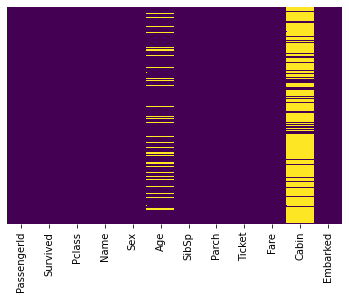

In [9]:
#check missing data in each column with heatmap
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

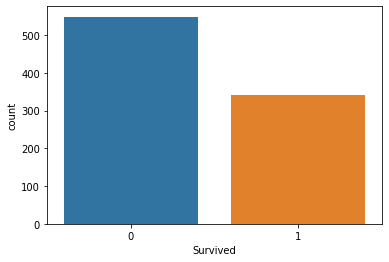

In [10]:
#check survived column
sns.countplot(x = 'Survived', data=train_data)

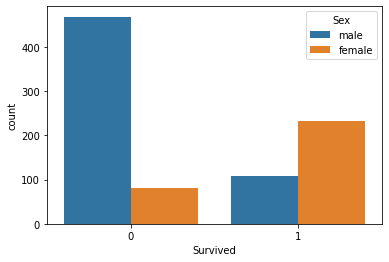

In [11]:
sns.countplot(x = 'Survived', hue = 'Sex', data=train_data)

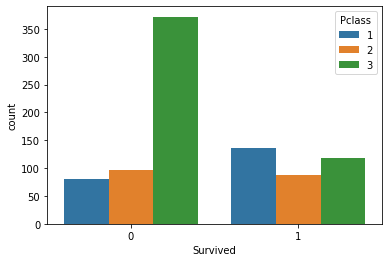

In [12]:
#check survived with Pclass as group by
sns.countplot(x = 'Survived', hue='Pclass', data=train_data)

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Working with Missing Value**

Here use mean value for each of the column conatining missing values

In [15]:
a = train_data[['Pclass', 'Age']]
a.head()

,Pclass,Age
0,3,22.0
1,1,38.0
2,3,26.0
3,1,35.0
4,3,35.0


In [16]:
a.mean()

Pclass     2.308642
Age       29.699118
dtype: float64

In [17]:
#claculating the average mean of all feature according the different class level from pandas
train_data[train_data['Pclass'] == 1].mean()

PassengerId    461.597222
Survived         0.629630
Pclass           1.000000
Age             38.233441
SibSp            0.416667
Parch            0.356481
Fare            84.154687
dtype: float64

In [18]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass  == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [19]:
train_data['Age'] = train_data[['Age', 'Pclass']].apply(impute_age, axis=1)

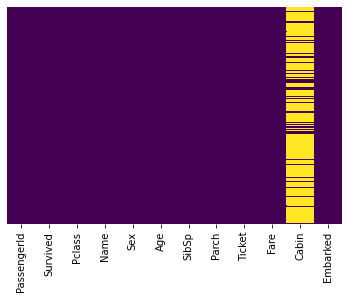

In [20]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [21]:
#dropping cabin column
train_data.drop('Cabin', axis=1, inplace=True)

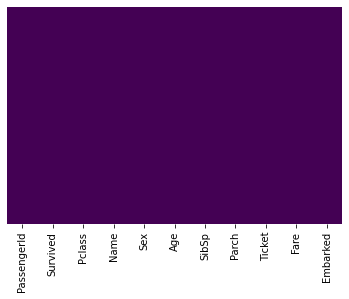

In [22]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [23]:
#now one missing value in Embarked column so remove that
train_data.dropna(inplace=True)

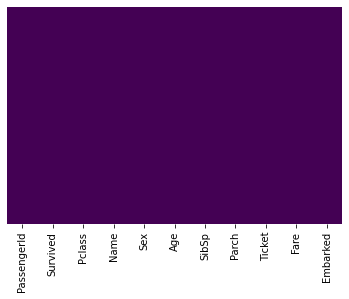

In [24]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

**Working with Categorical Data**

sex and Embarked column

In [25]:
pd.get_dummies(train_data['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [26]:
sex = pd.get_dummies(train_data['Sex'], drop_first=True)

In [27]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [28]:
pd.get_dummies(train_data['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [29]:
embark = pd.get_dummies(train_data['Embarked'], drop_first=True)

In [30]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [31]:
train_data = pd.concat([train_data, sex, embark], axis=1)

In [32]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [33]:
train_data.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'SibSp', 'Parch'], axis = 1, inplace=True)

In [34]:
train_data.head()

,PassengerId,Survived,Pclass,Age,Fare,male,Q,S
0,1,0,3,22.0,7.2500,1,0,1
1,2,1,1,38.0,71.2833,0,0,0
2,3,1,3,26.0,7.9250,0,0,1
3,4,1,1,35.0,53.1000,0,0,1
4,5,0,3,35.0,8.0500,1,0,1


In [35]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Model**

In [36]:
X_test = test_data.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'SibSp', 'Parch'], axis=1)

In [37]:
X_test.head()

,PassengerId,Pclass,Age,Fare,Cabin
0,892,3,34.5,7.8292,NaN
1,893,3,47.0,7.0000,NaN
2,894,2,62.0,9.6875,NaN
3,895,3,27.0,8.6625,NaN
4,896,3,22.0,12.2875,NaN


In [38]:
X_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']